# LOGISTIC REGRESSION ASSIGNMENT | Dry Bean Data Classification

## Introduction of the Dataset

The Dry Bean Dataset consists of 13,611 samples with 17 features related to the geometry and shape of dry beans. It includes measurements like area, perimeter, axis lengths, and various shape factors. The target variable, "Class," is a categorical label representing different types of dry beans. This dataset is ideal for classification tasks, aiming to predict the type of dry bean based on its physical attributes.

Target:
- Class: Object (categorical), represents the type or class of the dry bean. This is the target variable for classification.

## Import Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [28]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Basic Information of dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Summary of the dataset

In [30]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Checking Missing values in DataFrame

In [31]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Handle Categorical Variables

In [32]:
# Convert categorical target variable to numerical
df['Class'] = df['Class'].astype('category').cat.codes
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


## Visualizations

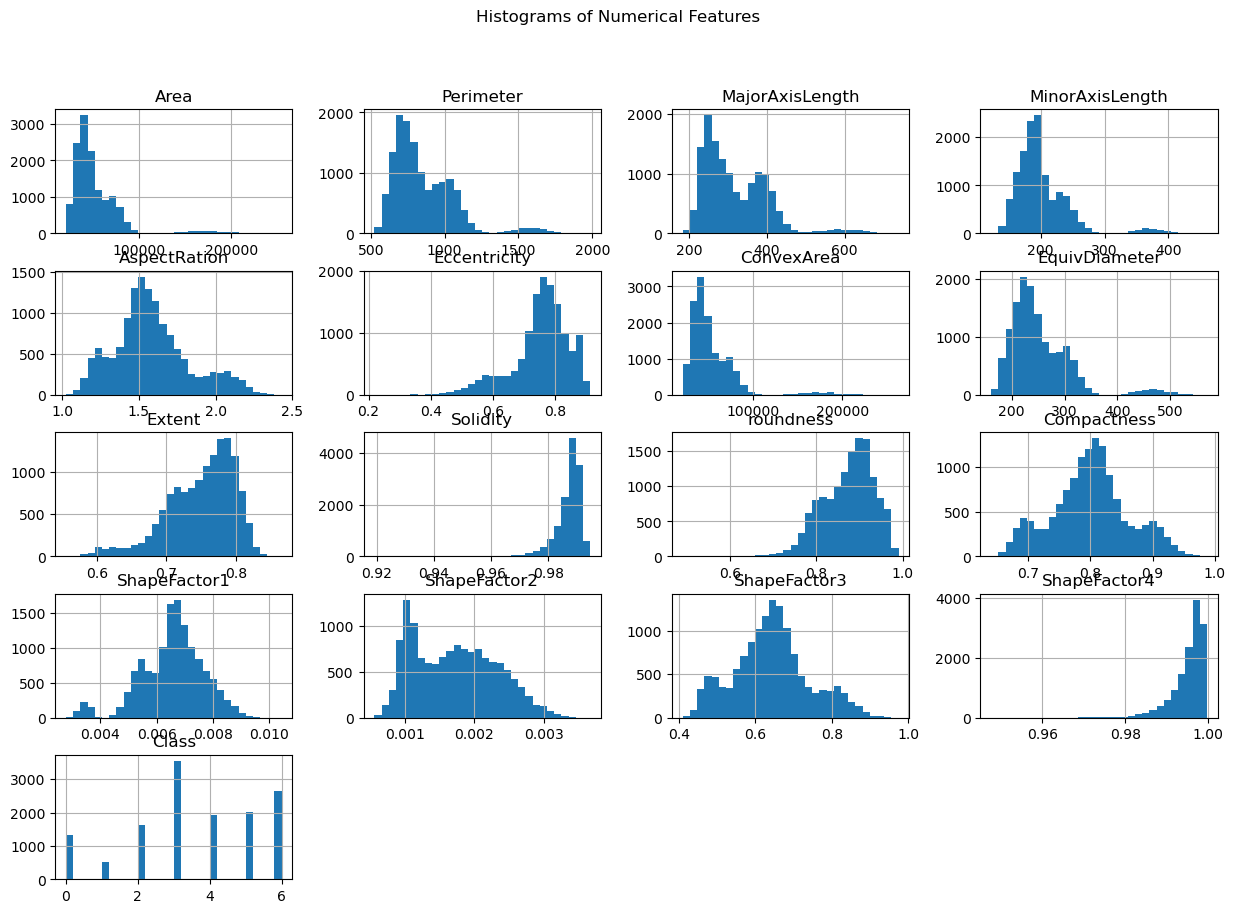

In [33]:
# Plot histograms
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

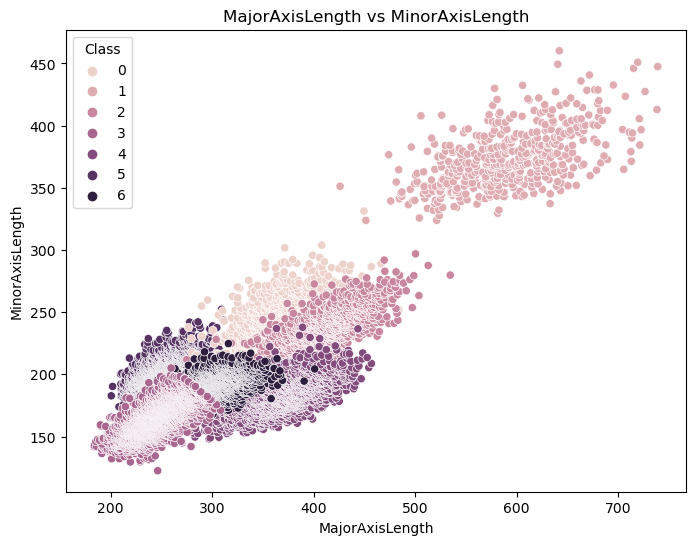

In [34]:
# Scatter plot example (MajorAxisLength vs MinorAxisLength)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MajorAxisLength', y='MinorAxisLength', data=df, hue='Class')
plt.title('MajorAxisLength vs MinorAxisLength')
plt.show()

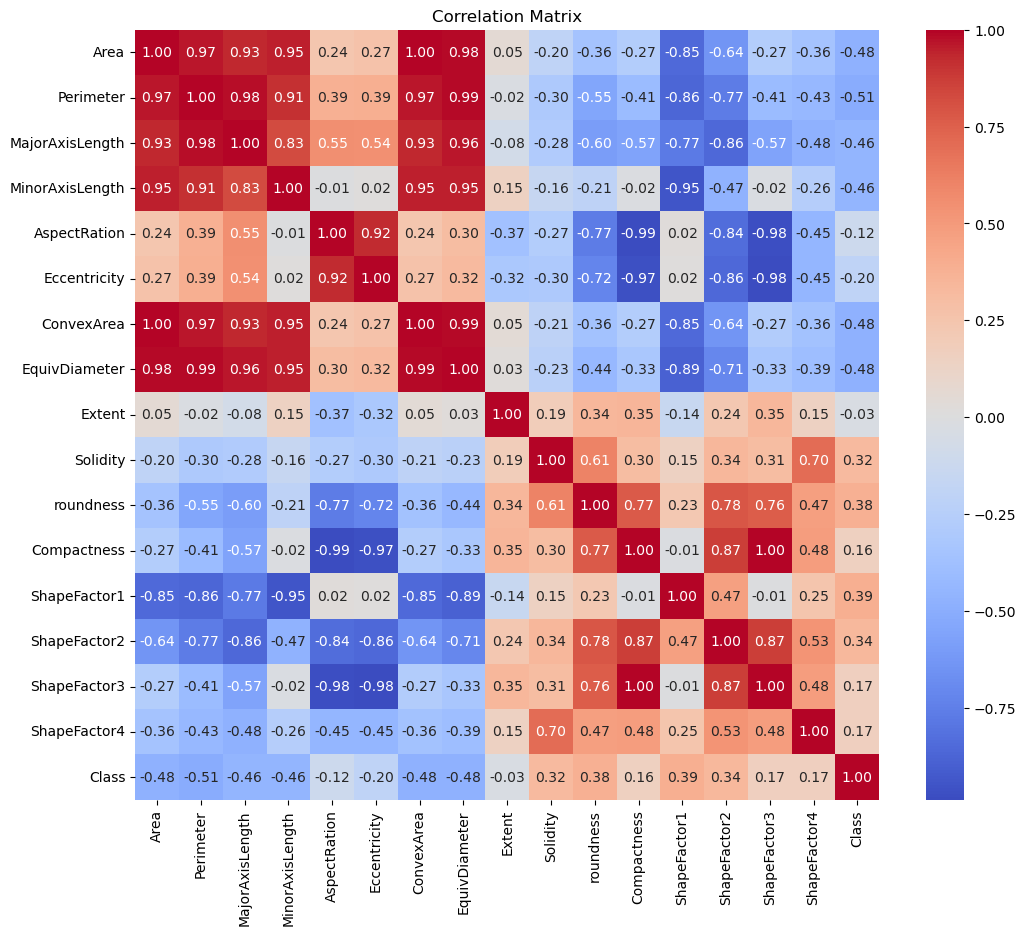

In [35]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Histograms: To visualize the distribution of numerical features.
- Scatter Plots: To examine the relationships between pairs of features.
- Correlation Matrix: To identify how features are correlated with each other.

## Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_scaled

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [38]:
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int8

## Splitting the Dataset

In [39]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (9527, 16) (9527,)
Testing set shape: (4084, 16) (4084,)


## Implement Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with chosen parameters
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

- LogisticRegression model. By default, multi_class='auto' which is typically set to 'ovr' when the number of classes is more than two.
- One-vs-Rest (OvR): This strategy fits one classifier per class, with the class being the positive class and all other classes as the negative class.
- Solver: The solver determines the algorithm used for optimization. liblinear is a good choice for smaller datasets, while saga is suitable for larger datasets and supports L1 and L2 regularization.

# Train the model on the Training Data

In [41]:
log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

## Make predictions on the Test Data

In [42]:
y_pred = log_reg.predict(X_test)
y_pred

array([5, 0, 5, ..., 4, 5, 0], dtype=int8)

## Calculate Evaluation Metrics

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
ROC-AUC Score: 0.99


## Confusion Matrix

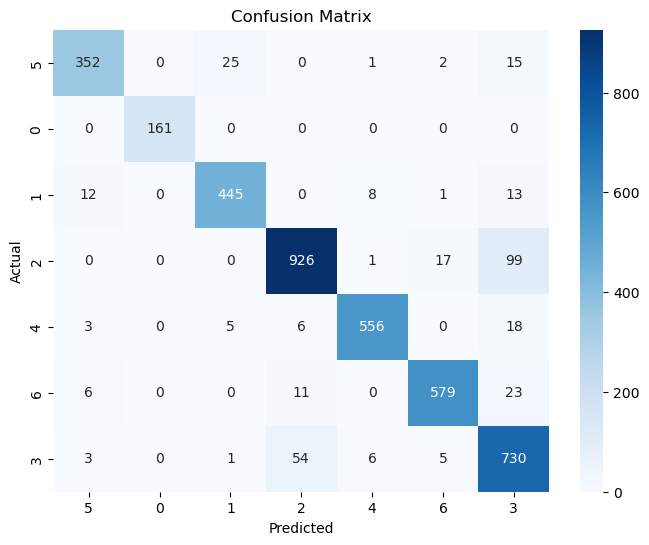

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Class'].unique(), yticklabels=df['Class'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- The confusion matrix visualizes the performance of the classification model by showing the number of true positives, true negatives, false positives, and false negatives. It provides insights into the types of errors made by the model.

## Classification Report

In [45]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       395
           1       1.00      1.00      1.00       161
           2       0.93      0.93      0.93       479
           3       0.93      0.89      0.91      1043
           4       0.97      0.95      0.96       588
           5       0.96      0.94      0.95       619
           6       0.81      0.91      0.86       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



- The classification report summarizes key performance metrics such as precision, recall, and F1-score for each class, offering a detailed view of the model's accuracy and effectiveness in classifying each class

## Plot the ROC Curve

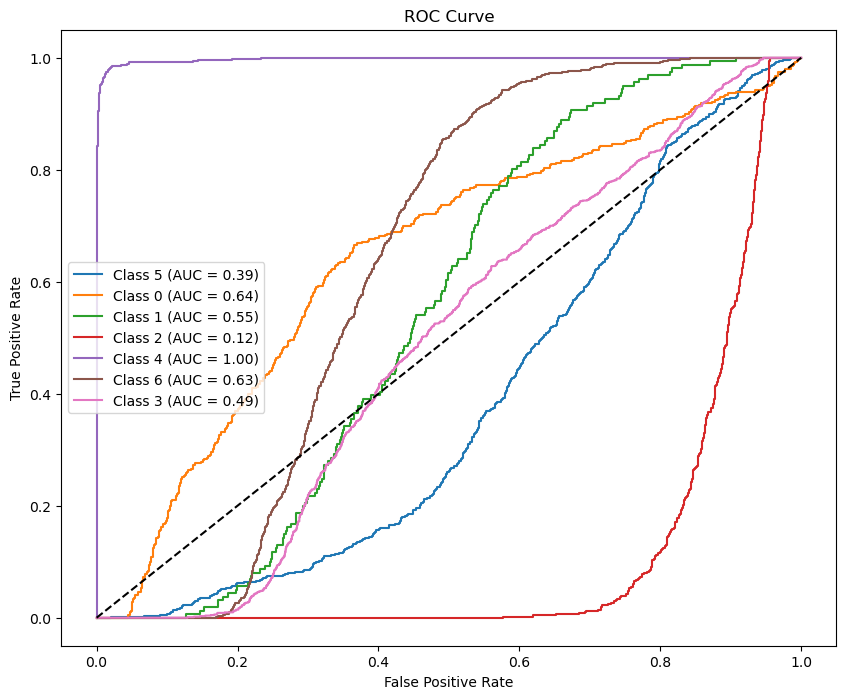

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=df['Class'].unique())
y_pred_prob = log_reg.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {df["Class"].unique()[i]} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

- The ROC curve plots the true positive rate against the false positive rate for different threshold values, illustrating the model's ability to discriminate between classes. The area under the ROC curve (AUC) represents the overall performance of the model.

## Visualizing Model Coefficients

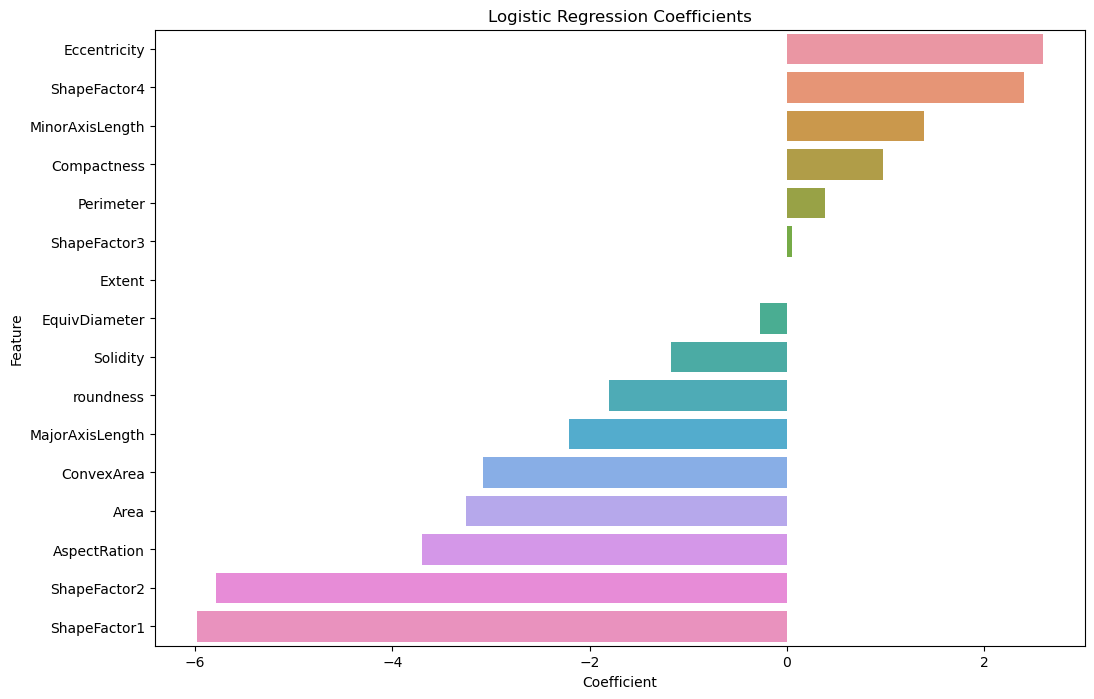

In [47]:
# Coefficients and Feature Names
coefficients = log_reg.coef_[0]
features = df.columns[:-1]  # Exclude target variable

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.show()

- Coefficients: Show the weight of each feature in the model, indicating feature importance.
- Bar Plot: Visualizes the impact of each feature on the model’s predictions.

## Hyperparameter Tuning with Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'multi_class': ['ovr', 'auto']  # Multi-class strategy
}

# Initialize the Grid Search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 1, 'multi_class': 'auto', 'solver': 'saga'}
Best Cross-validation Score: 0.9244247066178637
Confusion Matrix (Best Model):
 [[360   0  22   0   0   2  11]
 [  0 161   0   0   0   0   0]
 [ 18   0 445   0   7   2   7]
 [  0   0   0 941   1  18  83]
 [  3   0   5   5 561   0  14]
 [  8   0   0   9   0 583  19]
 [  1   0   1  57  10  11 719]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       395
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.93       479
           3       0.93      0.90      0.92      1043
           4       0.97      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- Grid Search: Grid Search exhaustively tests a predefined set of hyperparameters to identify the optimal combination for model performance. It systematically evaluates all possible combinations to enhance the model's accuracy and effectiveness.

# Summary

- After optimizing the Logistic Regression model for the Dry Bean Dataset, we achieved a best cross-validation score of approximately 0.92 using parameters {'multi_class': 'ovr', 'solver': 'liblinear'}. The confusion matrix indicates strong classification performance across all classes. The classification report highlights an overall accuracy of 92%, with high precision, recall, and F1-scores for each class.
-  Feature importance analysis shows that Eccentricity and ShapeFactor4 have the highest positive coefficients, while AspectRation and ShapeFactor1 are the most negatively influential, indicating their significant role in classification.